# The Source Code for Lab Exercise 3.
## Steps
1. Preprocess the Data.
2. Create a Train and Test Split
3. Create a Convolutional Neural Network using Keras.
4. Experiment on Various Elements
5. Discussion and Analysis of Experiments.

# Possible Things to Experiment on
1. Other Preprocessing methods for Images.
2. Adding Max Pooling.
3. Changing number of Filters.
4. Changing Kernel Size.
5. Changing Learning Rate.
6. Changing Optimizers.
7. TBA

### Checking the Dataset for valid Image types

In [44]:
from pathlib import Path
import imghdr
import os

DATA_DIR = "hair_types"
IMAGE_EXTENSIONS = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(DATA_DIR).rglob("*"):
    if filepath.suffix.lower() in IMAGE_EXTENSIONS:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

### Preprocessing Images and Creating Train/Test Splits using Keras util methods
#### Learn more:
```
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
```

In [45]:
# Import Tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Define parameters for preprocessor
BATCH_SIZE = 32
HEIGHT = 64
WIDTH = 64

In [46]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'hair_types/', # directory for images
    labels='inferred', # Uses the three labels of Curly_Hair, Straight_Hair, Wavy_Hair
    label_mode='categorical', # categorical is used for categorical_crossentropy, int is used for sparse_categorical_crossentropy, binary = binary_crossentropy
    class_names=['Curly_Hair', 'Straight_Hair', 'Wavy_Hair'],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=1337,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 985 files belonging to 3 classes.
Using 788 files for training.


In [47]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'hair_types/', # directory for images
    labels='inferred', # Uses the three labels of Curly_Hair, Straight_Hair, Wavy_Hair
    label_mode='categorical', 
    class_names=['Curly_Hair', 'Straight_Hair', 'Wavy_Hair'],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=1337,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 985 files belonging to 3 classes.
Using 197 files for validation.


### Preprocessing images from Scratch

### Visualize the Dataset

2024-04-09 20:48:39.576207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [788]
	 [[{{node Placeholder/_0}}]]
2024-04-09 20:48:39.576451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [788]
	 [[{{node Placeholder/_4}}]]


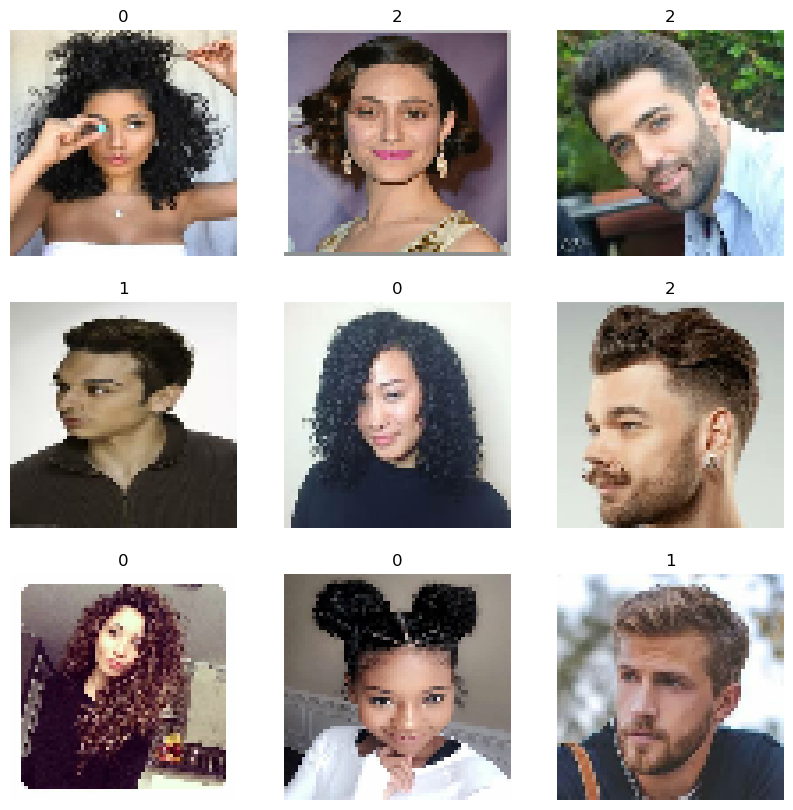

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

### Creating the CNN Model

In [49]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(keras.Input(shape=(HEIGHT, WIDTH) + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

tf.keras.utils.plot_model(model, to_file='test_logs//model_test.png', show_shapes=True)
EPOCHS = 50
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

Epoch 1/50


2024-04-09 20:48:40.540164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [788]
	 [[{{node Placeholder/_4}}]]
2024-04-09 20:48:40.540358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [788]
	 [[{{node Placeholder/_0}}]]


24/25 [===========================>..] - ETA: 0s - loss: 1.0998 - accuracy: 0.3542

2024-04-09 20:48:43.587725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [197]
	 [[{{node Placeholder/_4}}]]
2024-04-09 20:48:43.587923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [197]
	 [[{{node Placeholder/_4}}]]


25/25 [==============================] - 4s 114ms/step - loss: 1.0999 - accuracy: 0.3503 - val_loss: 1.0983 - val_accuracy: 0.2843
Epoch 2/50
25/25 [==============================] - 3s 96ms/step - loss: 1.0895 - accuracy: 0.3515 - val_loss: 1.0898 - val_accuracy: 0.3046
Epoch 3/50
25/25 [==============================] - 3s 98ms/step - loss: 1.0616 - accuracy: 0.4213 - val_loss: 1.0788 - val_accuracy: 0.3909
Epoch 4/50
25/25 [==============================] - 3s 102ms/step - loss: 1.0364 - accuracy: 0.4721 - val_loss: 1.0921 - val_accuracy: 0.3959
Epoch 5/50
25/25 [==============================] - 3s 96ms/step - loss: 1.0237 - accuracy: 0.4886 - val_loss: 1.0479 - val_accuracy: 0.4264
Epoch 6/50
25/25 [==============================] - 3s 96ms/step - loss: 1.0154 - accuracy: 0.4772 - val_loss: 1.1039 - val_accuracy: 0.4010
Epoch 7/50
25/25 [==============================] - 3s 112ms/step - loss: 1.0114 - accuracy: 0.4784 - val_loss: 1.0404 - val_accuracy: 0.4467
Epoch 8/50
25/25 [===

### Training of the Model

In [ ]:
cnn = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

### Evaluation of the Model

In [51]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=(HEIGHT, WIDTH)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = cnn.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)

1/1 [==============================] - 0s 37ms/step
This image is 0.95 percent curly hair, 0.04 percent straight hair, and 0.01 percent wavy hair.


### Visualization of Model with respect to Epochs

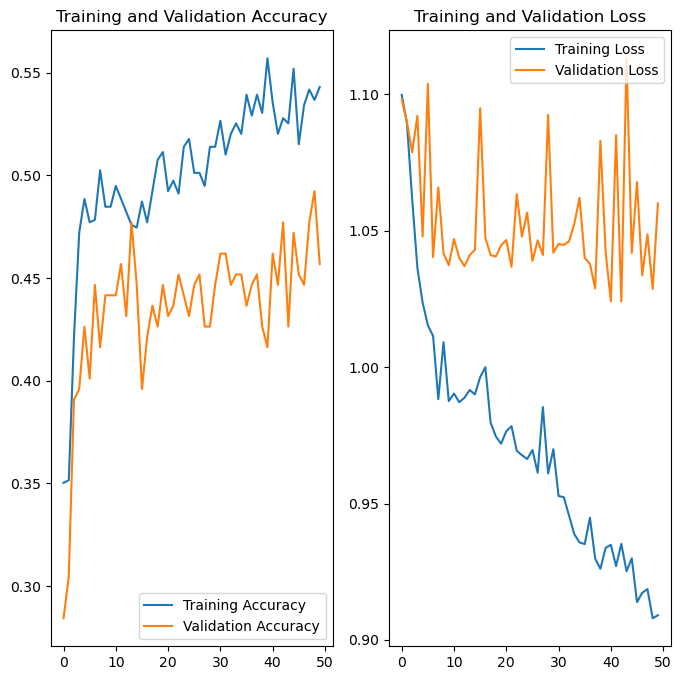

In [52]:
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']

loss = cnn.history['loss']
val_loss = cnn.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()